<a href="https://colab.research.google.com/github/nitiniitp/Time-series-modeling/blob/main/Time_Series_Modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

In [8]:
#option for bringing in Excel file
df = pd.read_excel("/content/Sample - Superstore.xlsx")
#option for bringing in the CSV file
#df = pd.read_csv("Sample - Superstore.xlsx")

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [9]:
#how much data?
#(rows, columns)
df.shape

(9994, 21)

In [ ]:
#what are my columns?
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#high level look at the data
#summarizes all quantitative read data in dataframe
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#what categories we have
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
#isolate only data related to furniture
furn = df.loc[df["Category"]=="Furniture"]

In [ ]:
furn.shape

(2121, 21)

In [ ]:
#time span, when was the begining
#year-month-day
furn["Order Date"].min()

Timestamp('2014-01-06 00:00:00')

In [ ]:
#time span, when the data ends
#year-month-day
furn["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
furn["Order Date"].min(),furn["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
furn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [ ]:
furn.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
#grouping data by the order data and focusing on sales data
furn1 = furn.groupby(["Order Date"])["Sales"].sum().reset_index()

In [ ]:
furn1.head(2)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728


In [ ]:
#indexing for time series data
furn2 = furn1.set_index("Order Date")

In [ ]:
furn2.head(2)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728


In [ ]:
#converting our daily values to our monthly
#we'll use the start of each month as the timestamp

sales_data = furn2["Sales"].resample('MS').mean()

In [ ]:
sales_data["2017":]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

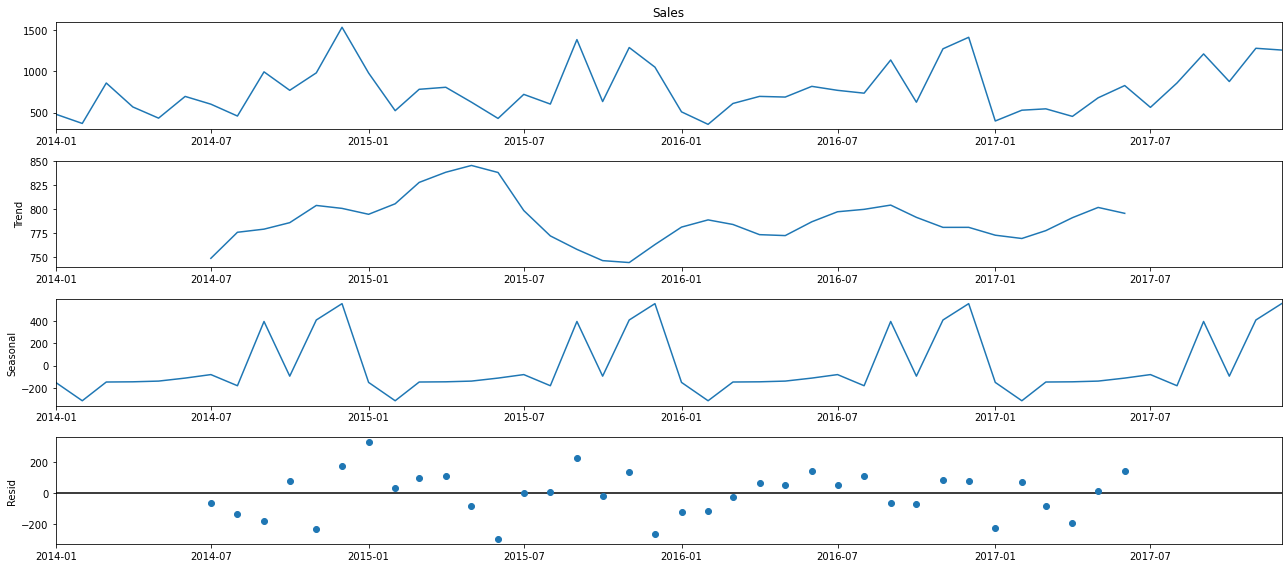

In [ ]:
#adjusting the plot size
from pylab import rcParams
rcParams["figure.figsize"] = 18,8

#creating a decomposition visualization
decomposition = sm.tsa.seasonal_decompose(sales_data, model="additive")
fig = decomposition.plot()
plt.show()

In [ ]:
#What is ARIMA?
#auto-regressive integrated moving averages
#predictors depend on the parameters (p,d,q)
#first goal will be to optimize these parameters

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

#quick divide for training and testing
train = sales_data[:int(0.8*(len(sales_data)))]
test = sales_data[int(0.8*(len(sales_data))):]
print(train.shape)
print(test.shape)

(38,)
(10,)


In [ ]:
#auto arima model training
model = auto_arima(train, trace=True, start_p=0, start_q=0, start_P=0,
                  start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10,
                  seasonal = True, stepwise = False, suppress_warnings=True,
                  D=1, max_D=10, error_action='ignore', approximation=False)
#fit our model
model.fit(train)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=546.452, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=547.477, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=549.295, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=550.755, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=547.587, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=549.584, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=551.162, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=549.558, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=551.518, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=553.157, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=553.818, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                        SARIMAX   Log Likelihood                -271.226
Date:                Sat, 17 Apr 2021   AIC                            546.452
Time:                        11:07:48   BIC                            549.727
Sample:                             0   HQIC                           547.617
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    765.6258     63.779     12.004      0.000     640.622     890.630
sigma2       9.27e+04   2.78e+04      3.332      0.001    3.82e+04    1.47e+05
===================================================================================
Ljung-Box (Q):                       50.74   Jarque-Bera (JB):                 4.95
Prob(Q):                              0.07   Prob(JB):                         0.08
Heteroskedasticity (H):               0.98   Skew:                             0.88
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=10), index=test.index)
prediction.columns = ["predicted_sales"]

test=test.reset_index()

In [ ]:
from sklearn.metrics import r2_score
r2_score(test["Sales"],prediction["predicted_sales"])

-0.09329616893369752